In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('results.csv')
df = df.rename(columns={'Unnamed: 0': 'target_model'})
df.head()


,target_model,gpt-3.5-turbo,Mixtral-8x7B-Instruct-v0.1,TimePerPrompt_GPT-3.5-turbo,TimePerPrompt_Mixtral-8x7B-Instruct-v0.1
0,gpt-3.5-turbo,0.76,0.550000,33.000,65.229000
1,mistralai/Mixtral-8x7B-Instruct-v0.1,0.50,0.510000,60.771,90.000000
2,Gryphe/MythoMax-L2-13b,0.92,0.800000,19.836,44.088000
3,Qwen/Qwen2.5-7B-Instruct-Turbo,0.26,0.353846,78.354,95.846154
4,google/gemma-2b-it,0.23,0.220000,53.270,84.000000


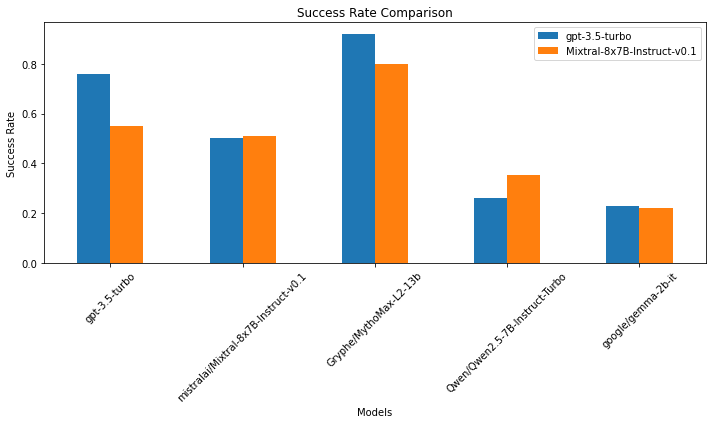

In [30]:
colors = sns.color_palette("tab10", n_colors=2)
df.plot(
    x='target_model', 
    y=['gpt-3.5-turbo', 'Mixtral-8x7B-Instruct-v0.1'], 
    kind='bar', 
    figsize=(10, 6),
    color=colors
)
plt.title('Success Rate Comparison')
plt.ylabel('Success Rate')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/success_rate_comparison.png", dpi=300, bbox_inches='tight')  
# plt.savefig("success_rate_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

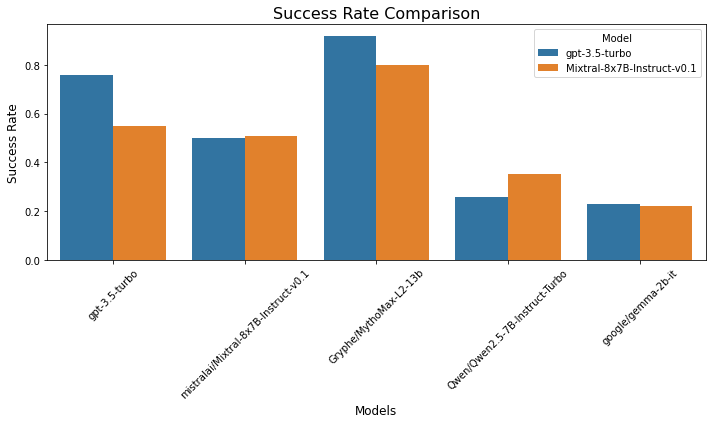

In [34]:
df_melted = df.melt(id_vars='target_model', 
                            value_vars=['gpt-3.5-turbo', 'Mixtral-8x7B-Instruct-v0.1'], 
                            var_name='Model', 
                            value_name='Success Rate')

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='target_model', y='Success Rate', hue='Model')

# Customize the plot
plt.title('Success Rate Comparison', fontsize=16)
plt.ylabel('Success Rate', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Model', fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig("images/success_rate_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

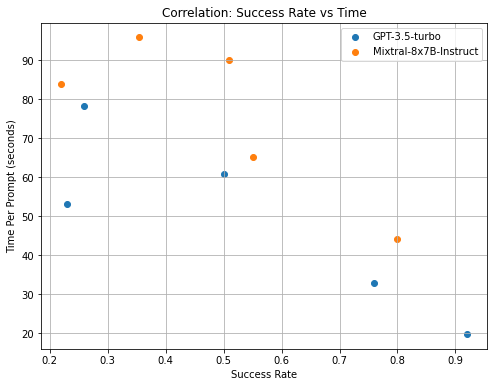

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['gpt-3.5-turbo'], df['TimePerPrompt_GPT-3.5-turbo'], label='GPT-3.5-turbo')
plt.scatter(df['Mixtral-8x7B-Instruct-v0.1'], df['TimePerPrompt_Mixtral-8x7B-Instruct-v0.1'], label='Mixtral-8x7B-Instruct')
plt.title('Correlation: Success Rate vs Time')
plt.xlabel('Success Rate')
plt.ylabel('Time Per Prompt (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
latex_table = df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
                        target\_model &  gpt-3.5-turbo &  Mixtral-8x7B-Instruct-v0.1 &  TimePerPrompt\_GPT-3.5-turbo &  TimePerPrompt\_Mixtral-8x7B-Instruct-v0.1 \\
\midrule
                       gpt-3.5-turbo &           0.76 &                    0.550000 &                       33.000 &                                 65.229000 \\
mistralai/Mixtral-8x7B-Instruct-v0.1 &           0.50 &                    0.510000 &                       60.771 &                                 90.000000 \\
              Gryphe/MythoMax-L2-13b &           0.92 &                    0.800000 &                       19.836 &                                 44.088000 \\
      Qwen/Qwen2.5-7B-Instruct-Turbo &           0.26 &                    0.353846 &                       78.354 &                                 95.846154 \\
                  google/gemma-2b-it &           0.23 &                    0.220000 &                       53.270 &                              

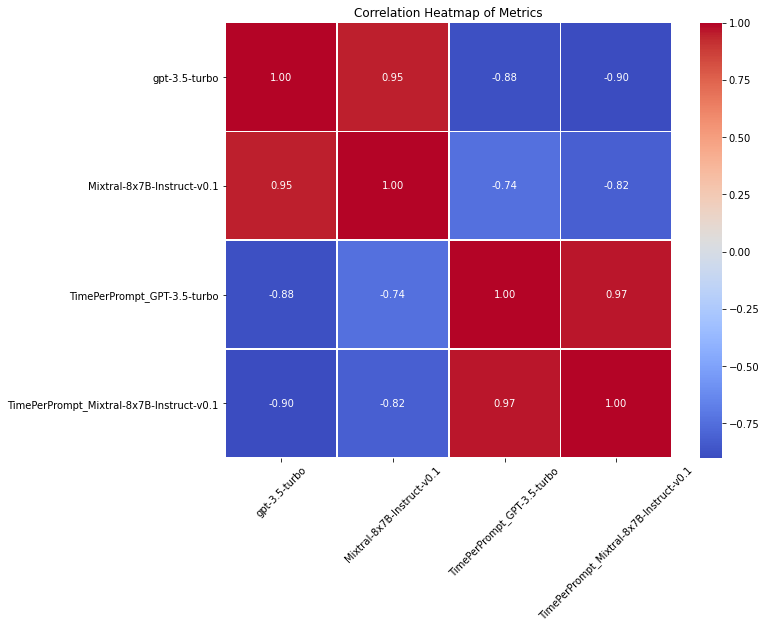

In [29]:
correlation_matrix = df.iloc[:, 1:].corr()  # Ignoring the first column (model names)

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Metrics")

# Rotate x-axis tick labels
plt.xticks(rotation=45)
plt.show()